In [16]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('replies_df.csv', encoding= 'unicode_escape')
df.head()

,id,thread_title,reply
0,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,"Hi stao, the response of the T64fx changes dep..."
1,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,I'm also interested.
2,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,maybe TTD can start reviewing some sp rubbers?
3,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,I do not know if tabletennisdaily can reiview ...
4,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,I`ve used to play for several months with 802-...


In [3]:
df.tail()

,id,thread_title,reply
1817,5f687a92887afbc97df83961,Pros' choice of Penholder f/h and RPB Rubbers,I'm pretty sure the Chinese players favour the...
1818,5f687a92887afbc97df83961,Pros' choice of Penholder f/h and RPB Rubbers,I think the tenergy rubber is over-rated hence...
1819,5f687a92887afbc97df83961,Pros' choice of Penholder f/h and RPB Rubbers,try haifu whale and shark. they are lighter th...
1820,5f687a92887afbc97df83961,Pros' choice of Penholder f/h and RPB Rubbers,Thanks for your reply! I've used haifu whale I...
1821,5f687a92887afbc97df83961,Pros' choice of Penholder f/h and RPB Rubbers,Non-tacky rubbers are better for RPB usually.T...


In [4]:
df.shape

(1822, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 3 columns):
id              1822 non-null object
thread_title    1822 non-null object
reply           1809 non-null object
dtypes: object(3)
memory usage: 42.8+ KB


In [6]:
df.describe()

,id,thread_title,reply
count,1822,1822,1809
unique,150,147,1795
top,5f687a04887afbc97df83903,Soft vs Hard Rubbers,"Thanx, I'm a loop oriented player on both wing..."
freq,73,73,3


In [7]:
df.nunique().sum()

2092

In [8]:
df.dtypes

id              object
thread_title    object
reply           object
dtype: object

In [9]:
len(df)

1822

In [10]:
df.count()

id              1822
thread_title    1822
reply           1809
dtype: int64

In [11]:
df.isna().sum()

id               0
thread_title     0
reply           13
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isna().sum()

id              0
thread_title    0
reply           0
dtype: int64

In [14]:
df.shape

(1809, 3)

In [15]:
df.describe().transpose()

,count,unique,top,freq
id,1809,138,5f687a04887afbc97df83903,73
thread_title,1809,136,Soft vs Hard Rubbers,73
reply,1809,1795,"Thanx, I'm a loop oriented player on both wing...",3


In [18]:
# Converting all threads in lowercase
df['cleaned_title'] = df['thread_title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# punctuation
df['cleaned_title'] = df['cleaned_title'].str.replace('[^\w\s]','')
df.head()

,id,thread_title,reply,cleaned_title
0,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,"Hi stao, the response of the T64fx changes dep...",tenergy 05fx vs tenergy 64fx
1,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,I'm also interested.,butterfly impartial xs vs 80240 vs spinlord wa...
2,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,maybe TTD can start reviewing some sp rubbers?,butterfly impartial xs vs 80240 vs spinlord wa...
3,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,I do not know if tabletennisdaily can reiview ...,butterfly impartial xs vs 80240 vs spinlord wa...
4,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,I`ve used to play for several months with 802-...,butterfly impartial xs vs 80240 vs spinlord wa...


In [19]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['cleaned_title'] = df['cleaned_title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [20]:
freq_title_words = pd.Series(' '.join(df['cleaned_title']).split()).value_counts()
freq_title_words

vs            680
rubber        484
rubbers       356
tenergy       311
hurricane     237
             ... 
64fx            1
r50             1
s2              1
iv              1
commercial      1
Length: 323, dtype: int64

In [21]:
# Rare words removal
rare_words_title = pd.Series(' '.join(df['cleaned_title']).split()).value_counts()[-10:]
rare_words_title

japan         1
compare       1
r42           1
euro          1
fxs           1
64fx          1
r50           1
s2            1
iv            1
commercial    1
dtype: int64

In [22]:
freq = list(rare_words_title.index)
df['cleaned_title'] = df['cleaned_title'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['cleaned_title'].head()

0                              tenergy 05fx vs tenergy
1    butterfly impartial xs vs 80240 vs spinlord wa...
2    butterfly impartial xs vs 80240 vs spinlord wa...
3    butterfly impartial xs vs 80240 vs spinlord wa...
4    butterfly impartial xs vs 80240 vs spinlord wa...
Name: cleaned_title, dtype: object

In [23]:
df['word_count_title'] = df['cleaned_title'].apply(lambda x: len(str(x).split(" ")))
df['char_count_title'] = df['cleaned_title'].str.len() ## this also includes spaces

In [24]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word_title'] = df['cleaned_title'].apply(lambda x: avg_word(x))

In [25]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords_title'] = df['cleaned_title'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['hastags_title'] = df['cleaned_title'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df['numerics_title'] = df['cleaned_title'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [26]:
df.head(7)

,id,thread_title,reply,cleaned_title,word_count_title,char_count_title,avg_word_title,stopwords_title,hastags_title,numerics_title
0,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,"Hi stao, the response of the T64fx changes dep...",tenergy 05fx vs tenergy,4,23,5.000,0,0,0
1,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,I'm also interested.,butterfly impartial xs vs 80240 vs spinlord wa...,8,50,5.375,0,0,1
2,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,maybe TTD can start reviewing some sp rubbers?,butterfly impartial xs vs 80240 vs spinlord wa...,8,50,5.375,0,0,1
3,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,I do not know if tabletennisdaily can reiview ...,butterfly impartial xs vs 80240 vs spinlord wa...,8,50,5.375,0,0,1
4,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,I`ve used to play for several months with 802-...,butterfly impartial xs vs 80240 vs spinlord wa...,8,50,5.375,0,0,1
5,5f686bcdb59794ca78c70905,What is the difference between Apalonia ZLC vs...,"apolonia weight more, u can find between 85-90...",difference apalonia zlc vs innerforce zlc,6,41,6.000,0,0,0
6,5f686bcdb59794ca78c70905,What is the difference between Apalonia ZLC vs...,thanks Konrad. Is the apalonia faster then the...,difference apalonia zlc vs innerforce zlc,6,41,6.000,0,0,0


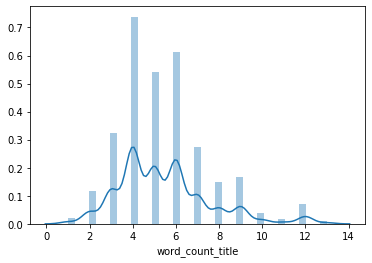

In [27]:
sns.distplot(df["word_count_title"])

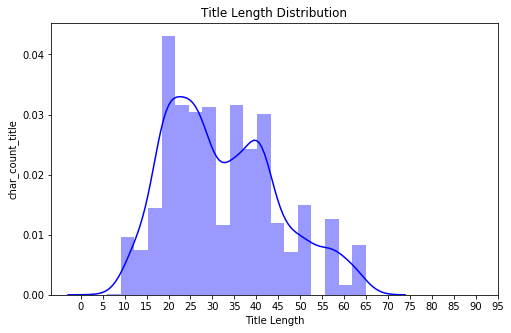

In [33]:
fig, ax = plt.subplots(figsize=(8,5))

sns.distplot(df['char_count_title'], color="b" )
ax.set(title='Title Length Distribution', xlabel='Title Length', ylabel='char_count_title', xticks = range(0, 100, 5))

plt.show()

In [34]:
print('mean of title length: ', df['char_count_title'].mean()) 
print('median of title length: ', df['char_count_title'].median()) 
print('min of title length: ' , df['char_count_title'].min()) 
print('max of title length: ', df['char_count_title'].max())

mean of title length:  32.318407960199
median of title length:  29.0
min of title length:  6
max of title length:  65


In [37]:
# Checking which are the longest reviews
df[(df['char_count_title']) == df['char_count_title'].max()]

,id,thread_title,reply,cleaned_title,word_count_title,char_count_title,avg_word_title,stopwords_title,hastags_title,numerics_title
140,5f6872ff10fb22f7fce1f8bd,Donic BlueStrom Z2 vs Xiom Omega V Asia for fh...,"Depending on where you live in Brazil, I find ...",donic bluestrom z2 vs xiom omega v asia fh sti...,13,65,4.076923,0,0,0
141,5f6872ff10fb22f7fce1f8bd,Donic BlueStrom Z2 vs Xiom Omega V Asia for fh...,A little bit off-topic: Take care of your blad...,donic bluestrom z2 vs xiom omega v asia fh sti...,13,65,4.076923,0,0,0
142,5f6872ff10fb22f7fce1f8bd,Donic BlueStrom Z2 vs Xiom Omega V Asia for fh...,I live in the Southeast portion of the country...,donic bluestrom z2 vs xiom omega v asia fh sti...,13,65,4.076923,0,0,0
143,5f6872ff10fb22f7fce1f8bd,Donic BlueStrom Z2 vs Xiom Omega V Asia for fh...,"Hey man,Since you are just getting back to the...",donic bluestrom z2 vs xiom omega v asia fh sti...,13,65,4.076923,0,0,0
144,5f6872ff10fb22f7fce1f8bd,Donic BlueStrom Z2 vs Xiom Omega V Asia for fh...,I heard same about Carbonado. No more with leg...,donic bluestrom z2 vs xiom omega v asia fh sti...,13,65,4.076923,0,0,0


In [43]:
# Tokenization
df['tokenized_title'] = pd.Series(df.cleaned_title.apply(lambda x: x.split()))
df.head()

,id,thread_title,reply,cleaned_title,word_count_title,char_count_title,avg_word_title,stopwords_title,hastags_title,numerics_title,tokenized_title
0,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,"Hi stao, the response of the T64fx changes dep...",tenergy 05fx vs tenergy,4,23,5.000,0,0,0,"[tenergy, 05fx, vs, tenergy]"
1,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,I'm also interested.,butterfly impartial xs vs 80240 vs spinlord wa...,8,50,5.375,0,0,1,"[butterfly, impartial, xs, vs, 80240, vs, spin..."
2,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,maybe TTD can start reviewing some sp rubbers?,butterfly impartial xs vs 80240 vs spinlord wa...,8,50,5.375,0,0,1,"[butterfly, impartial, xs, vs, 80240, vs, spin..."
3,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,I do not know if tabletennisdaily can reiview ...,butterfly impartial xs vs 80240 vs spinlord wa...,8,50,5.375,0,0,1,"[butterfly, impartial, xs, vs, 80240, vs, spin..."
4,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,I`ve used to play for several months with 802-...,butterfly impartial xs vs 80240 vs spinlord wa...,8,50,5.375,0,0,1,"[butterfly, impartial, xs, vs, 80240, vs, spin..."


In [45]:
from collections import Counter
Counter_title = Counter(df.cleaned_title)

In [47]:
most_common_title = Counter_title.most_common(50) 
  
print(most_common_title)

[('soft vs hard rubbers', 73), ('favorite chinesechinese like rubber', 72), ('prefer chinese rubber vs european rubbers', 58), ('friendship729 rubbers postspeedglue era', 50), ('top 10 fhbh rubbers', 50), ('xiom tenergy', 46), ('tibhar evolution mxp andro rasanter r47 hard flat strokes', 45), ('sunnysix rubbers gewo hype kr proyoo nam kyu itc ryu seung min', 42), ('european japanese rubber spinoriented play', 41), ('omega vii asia vs hurricane 3', 40), ('bad wrong use rubber cleaner much rubber', 38), ('t05h t05 closer mxp', 37), ('gewo nexxus el pro 50 53', 36), ('high spin rubber setup 2 brushloop forehand practice', 34), ('good rubber liftingattacking backspin bh', 31), ('butterfly tenergy 80 butterfly tenergy 05', 31), ('rubber change stay', 31), ('ttnpp vs prott', 29), ('need new bh rubber o7p vs dna pro', 27), ('fastarc g1 vs baracuda', 26), ('choice mantra genesis 1s genesis 2s', 26), ('buy hurricane iii national blue orange sponge', 26), ('rakza 7 vs evolution mxs', 25), ('hurr

In [49]:
most_freq_title = pd.DataFrame(most_common_title,columns=['words', 'count'])

most_freq_title.head(20)

,words,count
0,soft vs hard rubbers,73
1,favorite chinesechinese like rubber,72
2,prefer chinese rubber vs european rubbers,58
3,friendship729 rubbers postspeedglue era,50
4,top 10 fhbh rubbers,50
5,xiom tenergy,46
6,tibhar evolution mxp andro rasanter r47 hard f...,45
7,sunnysix rubbers gewo hype kr proyoo nam kyu i...,42
8,european japanese rubber spinoriented play,41
9,omega vii asia vs hurricane 3,40


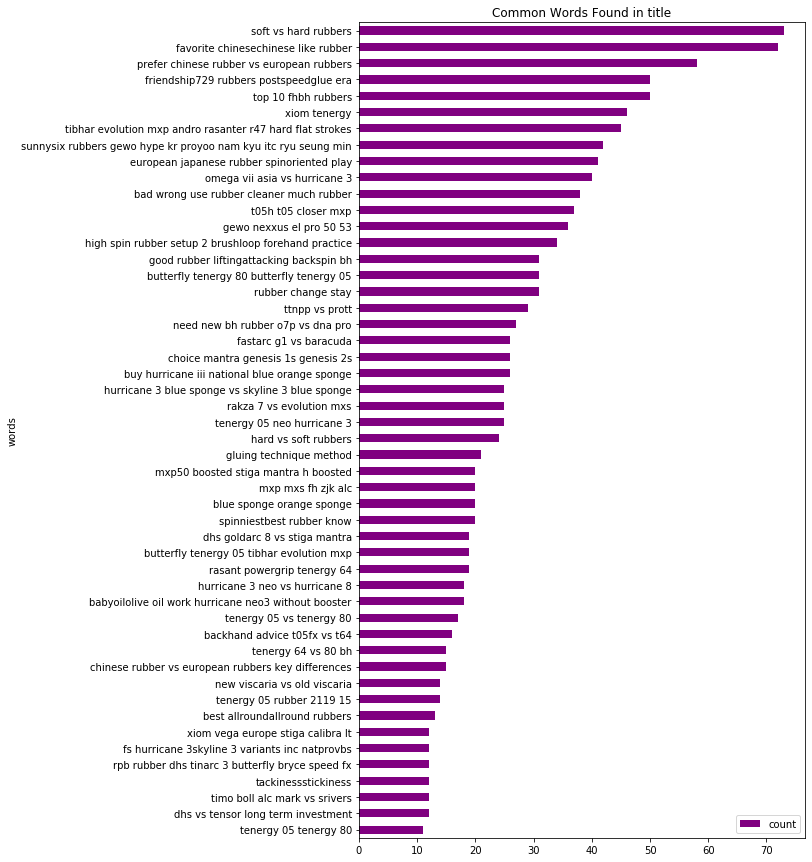

In [51]:
fig, ax = plt.subplots(figsize=(8, 15))

# Plot horizontal bar graph
most_freq_title.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in title")

plt.show()

In [52]:
from wordcloud import wordcloud
from PIL import Image

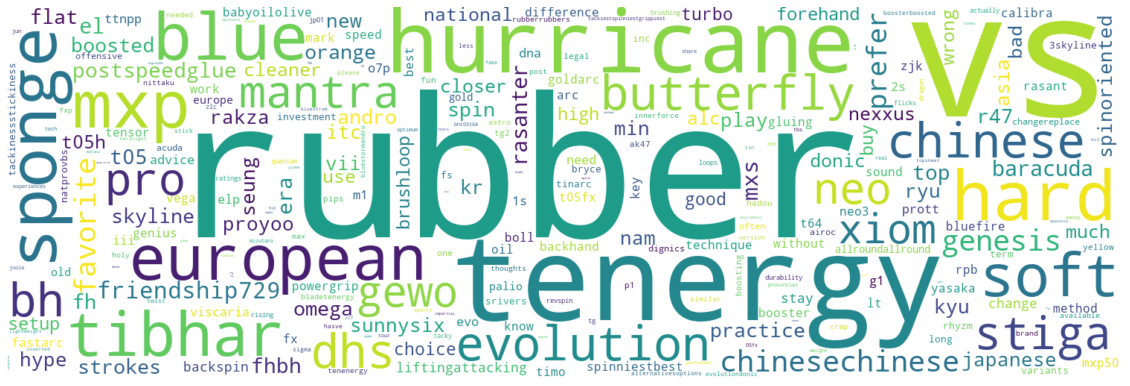

In [58]:
wc=wordcloud.WordCloud(width=1500, height=500, 
                       max_words = 5000,
                       background_color = 'white',
                       contour_color = 'steelblue',
                         collocations=False).generate(" ".join(df.cleaned_title))
plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [60]:
title = pd.Series(df.cleaned_title).apply(lambda x: x.split())
title

0                            [tenergy, 05fx, vs, tenergy]
1       [butterfly, impartial, xs, vs, 80240, vs, spin...
2       [butterfly, impartial, xs, vs, 80240, vs, spin...
3       [butterfly, impartial, xs, vs, 80240, vs, spin...
4       [butterfly, impartial, xs, vs, 80240, vs, spin...
                              ...                        
1817          [pros, choice, penholder, fh, rpb, rubbers]
1818          [pros, choice, penholder, fh, rpb, rubbers]
1819          [pros, choice, penholder, fh, rpb, rubbers]
1820          [pros, choice, penholder, fh, rpb, rubbers]
1821          [pros, choice, penholder, fh, rpb, rubbers]
Name: cleaned_title, Length: 1809, dtype: object

In [61]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(title)

In [63]:
# Convert list of titles into a Document Term Matrix using the dictionary.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in title]

In [64]:
import gensim
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [65]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=7, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [66]:
lda_model.print_topics()

[(0,
  '0.087*"vs" + 0.074*"rubber" + 0.040*"baracuda" + 0.033*"spin" + 0.033*"omega" + 0.032*"asia" + 0.030*"donic" + 0.030*"2" + 0.029*"spinoriented" + 0.029*"play"'),
 (1,
  '0.102*"rubber" + 0.033*"chinesechinese" + 0.033*"favorite" + 0.033*"like" + 0.028*"friendship729" + 0.026*"mxp" + 0.023*"postspeedglue" + 0.023*"era" + 0.023*"fhbh" + 0.023*"10"'),
 (2,
  '0.125*"vs" + 0.050*"chinese" + 0.049*"rubber" + 0.047*"tibhar" + 0.040*"rubbers" + 0.038*"evolution" + 0.036*"european" + 0.031*"prefer" + 0.027*"rasanter" + 0.026*"mxp"'),
 (3,
  '0.150*"sponge" + 0.134*"blue" + 0.076*"hurricane" + 0.068*"3" + 0.060*"orange" + 0.044*"alc" + 0.044*"buy" + 0.042*"vs" + 0.038*"turbo" + 0.034*"iii"'),
 (4,
  '0.172*"tenergy" + 0.132*"rubbers" + 0.089*"vs" + 0.073*"05" + 0.047*"soft" + 0.047*"hard" + 0.045*"xiom" + 0.044*"80" + 0.036*"genesis" + 0.030*"64"'),
 (5,
  '0.158*"hurricane" + 0.134*"3" + 0.076*"neo" + 0.073*"dhs" + 0.055*"vs" + 0.037*"national" + 0.036*"boosted" + 0.035*"stiga" + 0.035

In [67]:
# Visualize the topics
# pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. 
#The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

import pyLDAvis
from pyLDAvis import gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\pooja\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.085948 -0.389796       1        1  20.678364
2     -0.123916  0.055575       2        1  19.418205
4     -0.131453  0.248068       3        1  16.600319
0     -0.004395 -0.064014       4        1  13.688601
5      0.264695  0.040636       5        1  11.374117
3      0.321199  0.037878       6        1   9.834888
6     -0.240182  0.071654       7        1   8.405502, topic_info=    Category        Freq           Term       Total  loglift  logprob
1    Default  311.000000        tenergy  311.000000  30.0000  30.0000
55   Default  251.000000      hurricane  251.000000  29.0000  29.0000
115  Default  362.000000        rubbers  362.000000  28.0000  28.0000
54   Default  216.000000              3  216.000000  27.0000  27.0000
62   Default  146.000000         sponge  146.000000  26.0000  26.0000
..       ...         ...            ...         ...      ...      ...
258   Topic7    0.163572  rubberrubbers    9.322708  -1.5667  -8.5283
229   Topic7    0.163509            ryu   39.739071  -3.0169  -8.5287
226   Topic7    0.163509            min   39.739071  -3.0169  -8.5287
222   Topic7    0.163509           hype   39.739071  -3.0169  -8.5287
223   Topic7    0.163509            itc   39.739071  -3.0169  -8.5287

[302 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
13        3  0.689865      05
13        4  0.139132      05
13        7  0.173916      05
232       1  0.976386      10
157       4  0.907065      15
...     ...       ...     ...
302       1  0.970816   wrong
141       4  0.683116      x1
72        3  0.908422    xiom
72        4  0.074665    xiom
83        2  0.872938  yellow

[284 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 1, 6, 4, 7])

In [ ]:
# TF and TFIDF

In [68]:
tf1 = (df['cleaned_title']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']


In [69]:
tf1.head(20)

,words,tf
0,tenergy,311.0
1,vs,680.0
2,05fx,6.0
3,impartial,4.0
4,spinlord,4.0
5,waran2,4.0
6,xs,4.0
7,butterfly,98.0
8,80240,4.0
9,zlc,8.0


In [70]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(df.shape[0]/ (len(df[df['cleaned_title'].str.contains(word)])))

In [71]:
tf1.head(10)

,words,tf,idf
0,tenergy,311.0,1.963195
1,vs,680.0,0.996241
2,05fx,6.0,4.409487
3,impartial,4.0,6.114235
4,spinlord,4.0,6.114235
5,waran2,4.0,6.114235
6,xs,4.0,3.373395
7,butterfly,98.0,3.295837
8,80240,4.0,6.114235
9,zlc,8.0,6.114235


In [72]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']

In [75]:
tf1.head(15)

,words,tf,idf,tfidf
0,tenergy,311.0,1.963195,610.553713
1,vs,680.0,0.996241,677.444092
2,05fx,6.0,4.409487,26.456922
3,impartial,4.0,6.114235,24.456940
4,spinlord,4.0,6.114235,24.456940
5,waran2,4.0,6.114235,24.456940
6,xs,4.0,3.373395,13.493580
7,butterfly,98.0,3.295837,322.992013
8,80240,4.0,6.114235,24.456940
9,zlc,8.0,6.114235,48.913881


In [ ]:
# Create TF-idf model
vectorizer = TfidfVectorizer(tokenizer=tokenizer)
doc_vectors = vectorizer.fit_transform([] + documents)



In [ ]:
# Calculate similarity
cosine_similarities = linear_kernel(doc_vectors[0:1], doc_vectors).flatten()
document_scores = [item.item() for item in cosine_similarities[1:]]